In [19]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels
import numpy as np
from labtools import plot_style, USER, LOC
import os
from matplotlib import pyplot as plt

In [20]:
PARAMS = {
    "title_font_size": 25,
    "grid_linewidth": 1,
    "grid_color":"orange",
    "grid_linestyle": "--",
    "ticks_lenght": 4,
    "ticks_lenght_minor": 2.5,
    "ticks_width": 2,
    "grid_alpha": 0.4,
    "labels_font_size": 35,
    "saveDir": ".",
    "fontsize":30,
    "fontStyle":'Helvetica',
    "plot_name":'default_name'
}
p = plot_style.plotting(PARAMS)
p.saveDir = '/Users/vladislavbushmakin/Desktop/pics_pres'

In [21]:
dump_name = "molec_jessy_low_power_190deg_0.dump"
dump = f"{LOC['data']}/{dump_name}"
data = get_dump(dump)

In [22]:
data

memmap([(0, 3, 17217988849451101), (0, 1, 17217988851606075),
        (0, 3, 17217988853330606), ..., (0, 4, 17284650607967530),
        (0, 2, 17284650620268794), (0, 3, 17284650885882770)],
       dtype=[('time_from_trig', '<u4'), ('channel', '<i4'), ('time', '<u8')])

In [ ]:
autoc_diffs_tot, autoc_diffs = correlation(data, corr_window=300000,
    start_chs=[1],
    stop_chs=[4],
    trig_ch=5,)

In [ ]:
y, x = np.histogram(autoc_diffs_tot, bins=100, range=(-300000, 300000))
plt.plot(x[:-1], y)

In [ ]:
data = shift_channels(data, -500, channels=[4])

In [ ]:
autoc_diffs_tot2, autoc_diffs2 = correlation(data, corr_window=300000,
    start_chs=[1],
    stop_chs=[4],
    trig_ch=5,)

In [ ]:
y, x = np.histogram(autoc_diffs_tot2, bins=550, range=(-300000, 300000))

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[:-1]/1000, y)
plt.grid()
plt.annotate(f"{np.round(min(y), 2)}", xy = (30, 0.1))
p.save(f"12-34_correlation")

In [ ]:
autoc_diffs_tot, autoc_diffs = correlation(data[data['time'] < start_t0 + 5*1e12], corr_window=300000,
    start_chs=[1,2],
    stop_chs=[3,4],
    trig_ch=5,)

In [ ]:
y, x = np.histogram(autoc_diffs_tot, bins=550, range=(-300000, 300000))
plt.plot(x[:-1], y)

In [ ]:
start_t0 = data['time'][0]
plots = []
for t in np.arange(1e-13, 5, 0.1):
    autoc_diffs_tot, autoc_diffs = correlation(data[data['time'] < start_t0 + t*1e12], corr_window=300000,
        start_chs=[1,2],
        stop_chs=[3,4],
        trig_ch=5,)
    y, x = np.histogram(autoc_diffs_tot, bins=550, range=(-300000, 300000))
#     y_normLevel = np.mean(y[np.abs(x[:-1])>80_000])
    x, y = x[:-1]/1000, y
    plots.append((y,x))

In [ ]:
import imageio
import os
def generate_animation_imgs(plots, name='nm.gif', duration=0.1):
    imgs = []
    y0, x0 = plots[0]
    p.plot(x0, y0, xLabel=r'$\Delta t$, ns', yLabel = r"$G^{(2)}(t)$")
    plt.ylim((0, 430))
    for i, gg in enumerate(plots):
        y, x = gg
        p.plot(x, y, xLabel=r'$\Delta t$, ns', yLabel = r"$G^{(2)}(t)$")
        plt.ylim((0, 430))
        plt.savefig(f"img{i}.png", dpi=150)
        imgs.append(imageio.imread(f"img{i}.png"))
        os.remove(f"img{i}.png")
    imageio.mimsave(name, imgs, loop=0, duration=duration)

In [ ]:
generate_animation_imgs(plots)

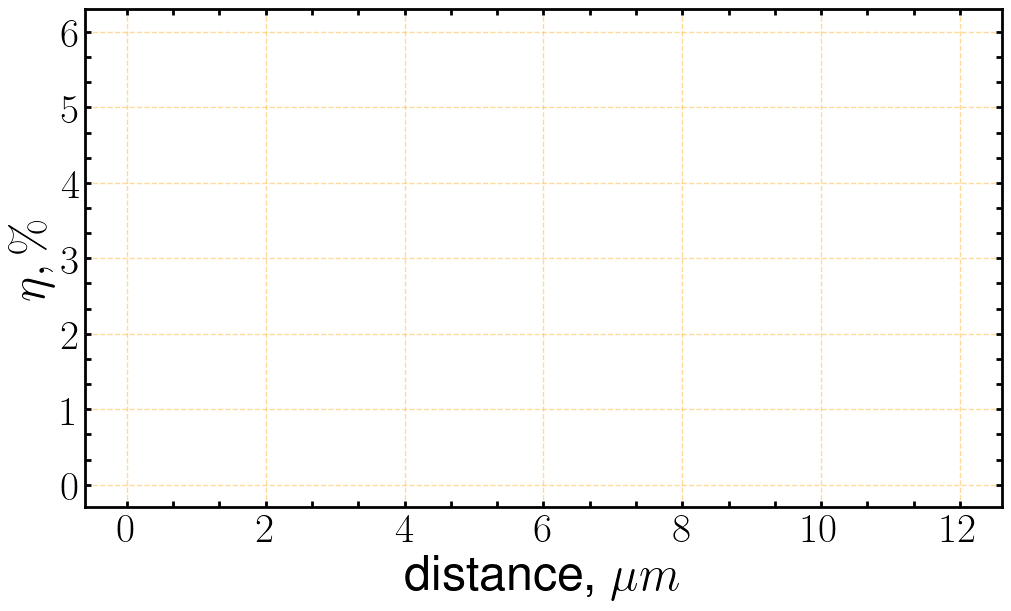

In [18]:
p.plot([0,2,4,6,8,10,12], [0,1,2,3,4,5,6], xLabel=r'distance, $\mu m$', yLabel=r'$\eta, \%$', ticks_in_between=2, tick_step_x=2, tick_step_y=1)
for l in plt.gca().lines:
    l.set_alpha(.0)
p.save('frame') 

In [23]:
def finesse(R1, R2):
    return ((R1*R2)**(1/4))/(1-(R1*R2)**(1/2))

In [24]:
finesse(0.04, 0.9)

0.5375878381214708

In [25]:
0.13*180

23.400000000000002